<a href="https://colab.research.google.com/github/kassy75035/Computer-Vision/blob/main/Day008_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 8 作業

## [作業目標]
* 熟悉濾波器的操作

    1. 比較四種低通濾波器的去噪能力及運算時間 (Average, Gaussian, NL, Median)
    2. 比較兩種邊緣偵測演算法的效果及運算時間 (Sobel, Canny)

## [作業重點]
* 熟悉 OpenCV 的 filter2D 函數
* 觀察圖片的變化

In [1]:
from google.colab.patches import cv2_imshow # for image display
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


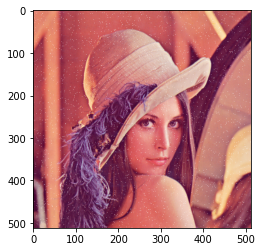

In [3]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

""" Your Code Here: 讀取 lena_noise.png 並使用 matplotlib 顯示 """
img_path = '/content/gdrive/My Drive/Colab Notebooks/ComputerVision/data/lena_noise.png'
img = cv2.imread(img_path)
plt.imshow(img[:,:,[2,1,0]])

# 1. 比較四種低通濾波器的去噪能力及運算時間 (Average, Gaussian, NL, Median)
* 因為 Average, Gaussian 都是使用 filter2D 去掃描圖片，故速度差不多
* NL 具較高的時間複雜度，需要較久的時間
* Median 具有最好的去白噪點效果，因為該演算法只會取範圍內的中位數，可以徹底去除極端值

In [13]:
# Average filter
start = time.time()
avg_filter = np.ones((3,3))/9
img_avg = cv2.filter2D(img, -1, avg_filter)
end = time.time()
time_avg = end - start

0.0071523189544677734

In [14]:
# Gaussian filter
start = time.time()
gau_filter = np.array([[1,2,1],
             [2,4,2],
             [1,2,1]]) / 16
img_gau = cv2.filter2D(img, -1, gau_filter)
end = time.time()
time_gau = end - start

In [15]:
# NL
start = time.time()
img_NL = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21) 
end = time.time()
time_NL = end - start

In [16]:
# Median filter
start = time.time()
img_med = cv2.medianBlur(img, 3)
end = time.time()
time_med = end - start

In [17]:
print('Average:', time_avg)
print('Gaussin:', time_gau)
print('NL:', time_NL)
print('Median:', time_med)

Average: 0.0071523189544677734
Gaussin: 0.004326581954956055
NL: 1.2051613330841064
Median: 0.001087188720703125


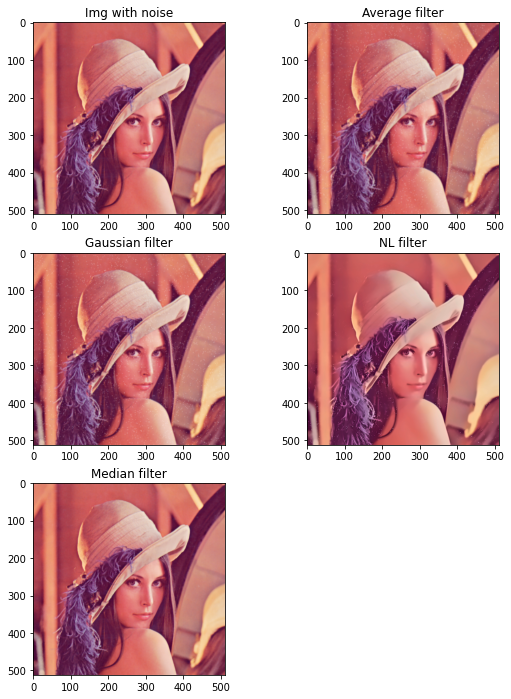

In [21]:
""" Your Code Here: 分別比較四個演算法的運算時間及畫出處理後的圖片 """
show_img = [img, img_avg, img_gau, img_NL, img_med]
show_name = ['Img with noise', 'Average filter', 'Gaussian filter', "NL filter", 'Median filter']
plt.figure(figsize = (9,12))
for i, img in enumerate(show_img):
  plt.subplot(3,2,i+1, title=show_name[i])
  plt.imshow(img[:, :, [2,1,0]])



# 2. 比較兩種邊緣偵測演算法的效果及運算時間 (Sobel, Canny)

In [23]:
def sobel(gray):
    """ Your Code Here: 實作 Sobel 演算法 """
    sobel_x = np.array([
         [1, 2, 1],
         [0, 0, 0],
         [-1, -2, -1]               
    ])
    Gx = cv2.filter2D(gray, -1, sobel_x)
    
    sobel_y = np.array([
         [1, 0, -1],
         [2, 0, -2],
         [1, 0, -1]               
    ])
    Gy = cv2.filter2D(gray, -1, sobel_y)
    Gx = cv2.convertScaleAbs(Gx)
    Gy = cv2.convertScaleAbs(Gy)
    edge = cv2.addWeighted(Gx, 0.5, Gy, 0.5, 0)
    return edge

def canny(gray):
    """ Your Code Here: 實作 Canny 演算法 """
    gaussian_filter = np.array([
         [1, 2, 1],
         [2, 4, 2],
         [1, 2, 1]                       
    ]) / 16

    gray_gaussian = cv2.filter2D(gray, -1, gaussian_filter)
    edge = cv2.Canny(gray_gaussian, 50, 150)


    return edge

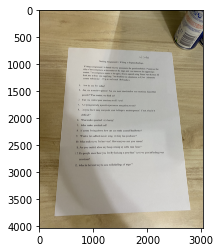

In [26]:
""" Your Code Here: 讀取 ./data/paper.jpg 進行實作 """

""" Your Code Here: 分別比較四個演算法的運算時間及畫出處理後的圖片 """
img_path = '/content/gdrive/My Drive/Colab Notebooks/ComputerVision/data/paper.jpg'
img_paper = cv2.imread(img_path)
plt.imshow(img_paper[:,:,[2,1,0]])

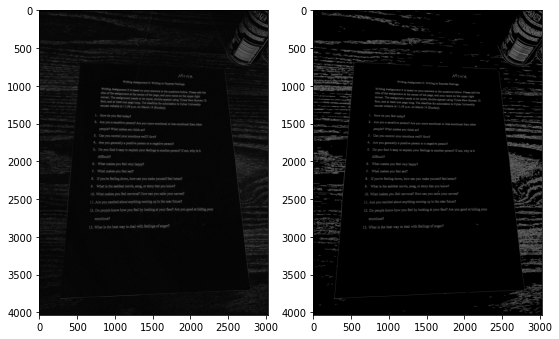

In [30]:
plt.figure(figsize = (9, 9))

img_gray = cv2.cvtColor(img_paper, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
img_sobel = sobel(img_gray)
plt.imshow(img_sobel, cmap = 'gray')

plt.subplot(1,2,2)
img_canny = canny(img_gray)
plt.imshow(img_canny, cmap = 'gray')